<a href="https://colab.research.google.com/github/f-ssemwanga/MachineLearning_DeepLearning/blob/main/002TensorFlow_Fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Manipulating Tensors (tensor operations)
***Basic Operations***

These are the basic arithmetic operators (+,-,*,/).  These are elementwise operations as they manipulate individual elements in a tensor

In [37]:
import tensorflow as tf

#You can add values to a tensor using the additon Operators
#Note that the original tensor is unchanged.
tensor1 = tf.constant([[10,7],[3,4]])
print(f'Original tensor before operation: {tensor1}')
print(f' Tensor after addition operation: {tensor1 +10}')
print(f'Original tensor before operation: {tensor1}')


Original tensor before operation: [[10  7]
 [ 3  4]]
 Tensor after addition operation: [[20 17]
 [13 14]]
Original tensor before operation: [[10  7]
 [ 3  4]]


In [38]:
#performing an increment operation on the original tensor alters the original tensor
tensor2 = tensor1 +10
print(f'Original tensor before operation: {tensor2}')


Original tensor before operation: [[20 17]
 [13 14]]


In [39]:
#Multiplication operation
print(f'Original tensor before operation: {tensor1}')
print(f' Tensor after addition operation: {tensor1*10}')
print(f'Original tensor before operation: {tensor1}')

Original tensor before operation: [[10  7]
 [ 3  4]]
 Tensor after addition operation: [[100  70]
 [ 30  40]]
Original tensor before operation: [[10  7]
 [ 3  4]]


In [40]:
#Subtraction operation
print(f'Original tensor before operation: {tensor1}')
print(f' Tensor after addition operation: {tensor1-10}')
print(f'Original tensor before operation: {tensor1}')

Original tensor before operation: [[10  7]
 [ 3  4]]
 Tensor after addition operation: [[ 0 -3]
 [-7 -6]]
Original tensor before operation: [[10  7]
 [ 3  4]]


In [41]:
#We can use the tensorflow built in functions too
#the qualified function is tf.math.multiply but we can do the alias which is tf.multiply
#GPU will be faster if you use built in functions
print(f' Tensor after addition operation: {tf.multiply(tensor1,10)}')

 Tensor after addition operation: [[100  70]
 [ 30  40]]


**Matrix Multiplication**

In machine learning, matrix multiplication is one of the most common tensor operations.

A good website to visualise this is [Matrix Multiplication.com](http://www.matrixmultiplication.xyz)

In [42]:
#matrix multiplication in tensorflow
print(tensor1)
tf.matmul(tensor1, tensor1)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [43]:
#matrix multiplication with the python "@operator"
tensor1 = tf.constant([[1,2,5],
                    [7,2,1],
                    [3,3,3]])
tensor2 = tf.constant([[3,5],[6,7],[1,8]])

tensor1.shape, tensor2.shape
tf.matmul(tensor1,tensor2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [44]:
#Matrix multiplication in python
tensor1 @ tensor2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [45]:
#Matrix multiplication on tensors of different shapes
#Create a tensor (3,2)
x = tf.constant([[1,2],[3,4],[5,6]])

#create another tensor (3,2)
y = tf.constant([[7,9],[9,10],[11,12]])

x,y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  9],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [61]:
#Matrix multiplucation of matrix with the same shape
x@y

InvalidArgumentError: ignored

In [48]:
tf.matmul(x,y)

InvalidArgumentError: ignored

**Rules for matrix multiplication**
1. The inner dimensions must match
2. The resulting matrix has the shape of the outer dimensions

In [49]:
x.shape, y.shape

(TensorShape([3, 2]), TensorShape([3, 2]))

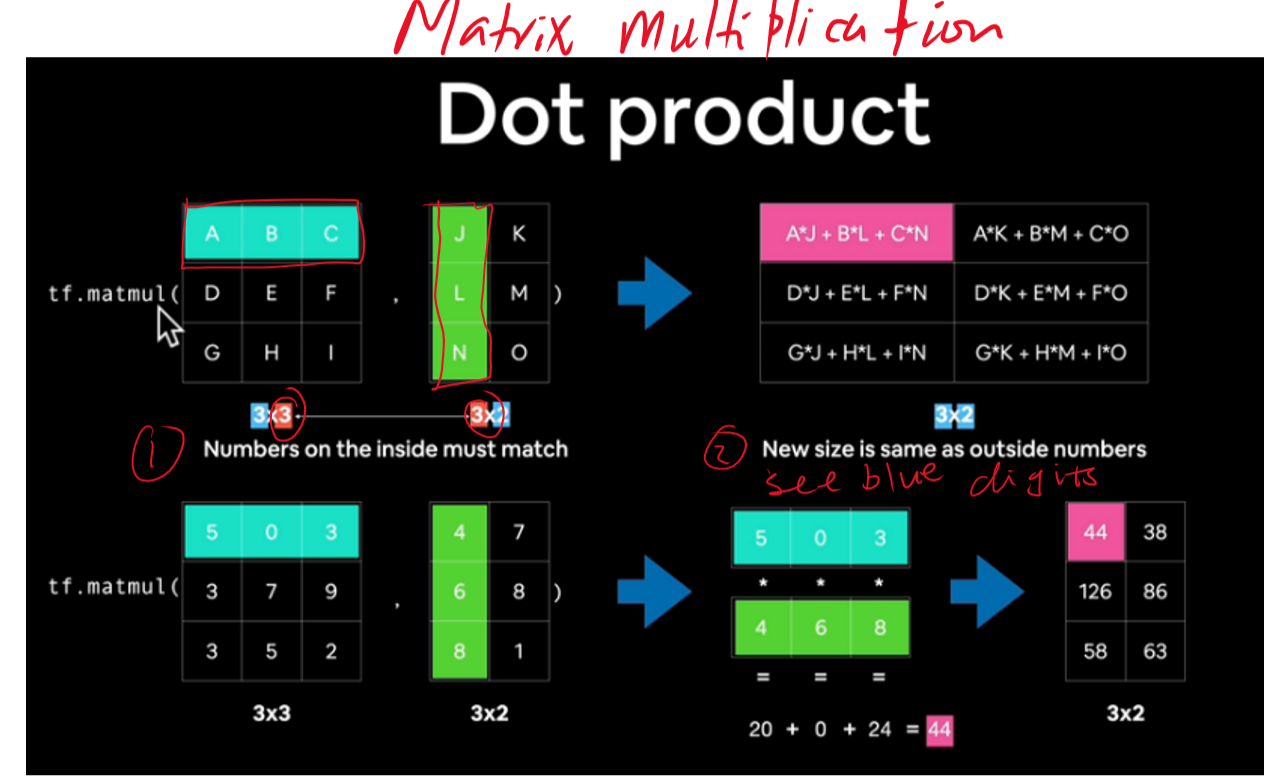
***Resource***
[Mathsisfun.com](https://www.mathsisfun.com/algebra/matrix-multiplying)

In [50]:
# Shape of x i.e. [3,2] and shape of y [3,2] does not meet requirement of rule 1 above
#Let us change the shape of y to perform a matrix multiplication
tf.reshape(y, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  9,  9],
       [10, 11, 12]], dtype=int32)>

In [51]:
#Try to matrix multiply x by the reshaped y
x @ tf.reshape(y,shape=(2,3))


<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  31,  33],
       [ 61,  71,  75],
       [ 95, 111, 117]], dtype=int32)>

In [54]:
#let us investigate the effect of reshaping x instead of y and performing matrix multiplication
tf.reshape(x, shape=(2,3)) @ y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  65],
       [139, 158]], dtype=int32)>

In [52]:
tf.reshape(x,shape=(2,3)).shape, y.shape
#resulting matrix of matrix multiplying the above will lead
#to the result taking the shape of the outer values which is 2x2

(TensorShape([2, 3]), TensorShape([3, 2]))

***Using Transpose***
Using Transpose transforms the matrix by flipping the axes


In [53]:
#Transpose operation on x
x, tf.transpose(x)

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>)

In [55]:
#showing the effect of transpose vs reshape
print(f'Original x: {x}')
print(f'Transposed x: {tf.transpose(x)}')
print(f'Reshaped x: {tf.reshape(x, shape=(2,3))}')

Original x: [[1 2]
 [3 4]
 [5 6]]
Transposed x: [[1 3 5]
 [2 4 6]]
Reshaped x: [[1 2 3]
 [4 5 6]]


In [56]:
#Try matrix multiplication with transpose
tf.matmul(tf.transpose(x), y)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  99],
       [116, 130]], dtype=int32)>

**The dot Product**

Matrix multiplication is also referred to as the dot product
You can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`

In [ ]:
#Perform the dot product on X and Y  (requires x or Y to be transposed)
x , y

In [58]:
#perform matrix multiplication between x and y (transposed)
tf.matmul(x, tf.transpose(y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 25,  29,  35],
       [ 57,  67,  81],
       [ 89, 105, 127]], dtype=int32)>

In [59]:
#perform matrix multiplication between x and y reshaped
tf.matmul(x,tf.reshape(y,shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  31,  33],
       [ 61,  71,  75],
       [ 95, 111, 117]], dtype=int32)>

In [60]:
#check the values of y, reshape y and transposed y
#showing the effect of transpose vs reshape
print(f'Normal y: \n{y}')
print(f'Transposed y: \n{tf.transpose(y)}')
print(f'Reshaped y: \n{tf.reshape(y, shape=(2,3))}')

Normal y: 
[[ 7  9]
 [ 9 10]
 [11 12]]
Transposed y: 
[[ 7  9 11]
 [ 9 10 12]]
Reshaped y: 
[[ 7  9  9]
 [10 11 12]]


⏰***Generally, when performing matrix multiplication on two tensors and one of the axes doesnt line up, you will transpose rather than reshape to satisfy the matrix multiplication rules***